### Explore Data Analyse
#### 1. Loading Dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
import pandas as pd

Data = '/Users/macintosh/Desktop/DryBeanDataset/Dry_Bean_Dataset.xlsx'

data = pd.read_excel(Data)
print(data)


        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.54981

#### 2. Understand Data 

In [3]:
#Examine Data Structure 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [4]:
#Data Describe
print("\nSummary statistics:")
data.describe()


Summary statistics:


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [5]:
print(data.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [6]:
print("\nNumber of duplicate rows:",data.duplicated().sum())


Number of duplicate rows: 68


In [7]:
# Class Distribution
print("\nClass distribution:")
print(data['Class'].value_counts())


Class distribution:
Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


#### 3. Visualization

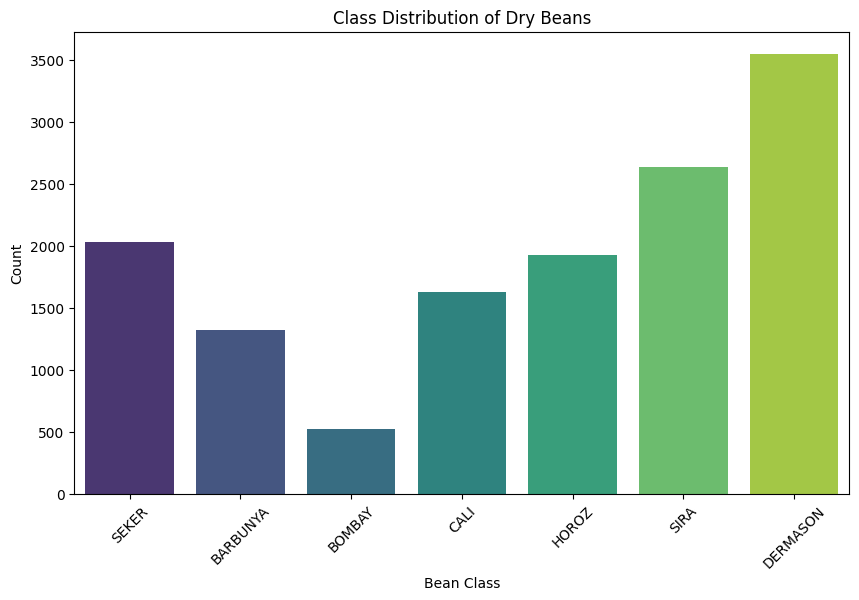

In [8]:
# Visualize class distribution

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Class', hue='Class', palette='viridis', dodge=False, legend=False)
plt.title('Class Distribution of Dry Beans')
plt.xlabel('Bean Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

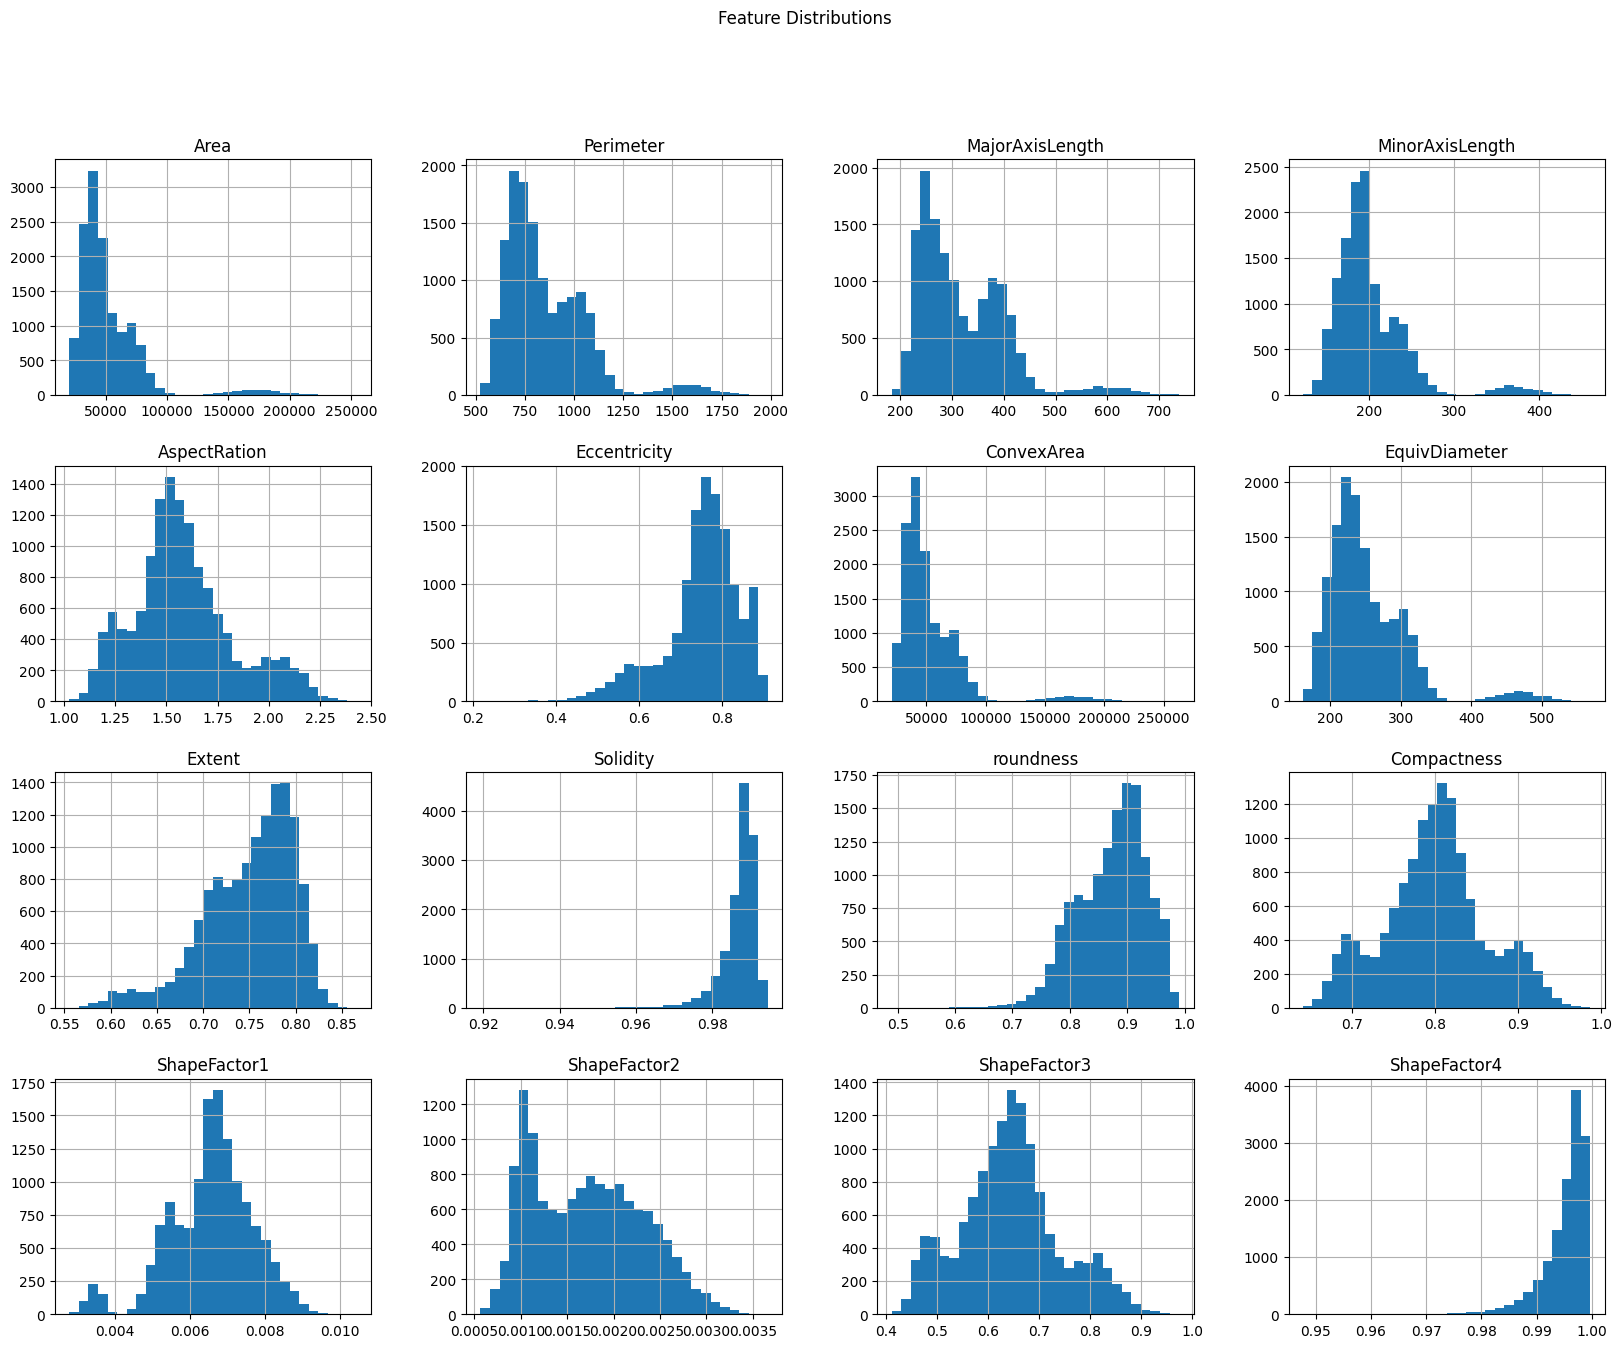

In [9]:
# Histograms/KDE plots for feature distributions
data.drop(columns='Class').hist(figsize=(20, 15), bins=30)
plt.suptitle('Feature Distributions')
plt.show()


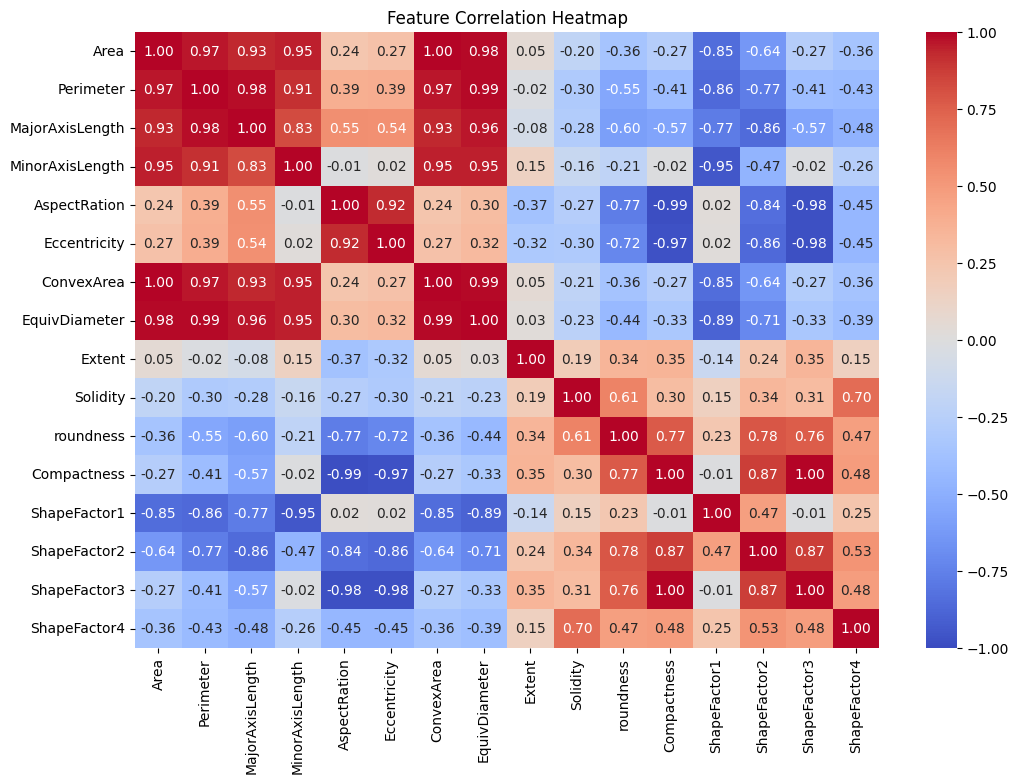


Highly correlated features: [('Area', 'Perimeter'), ('Area', 'MajorAxisLength'), ('Area', 'MinorAxisLength'), ('Area', 'ConvexArea'), ('Area', 'EquivDiameter'), ('Perimeter', 'Area'), ('Perimeter', 'MajorAxisLength'), ('Perimeter', 'MinorAxisLength'), ('Perimeter', 'ConvexArea'), ('Perimeter', 'EquivDiameter'), ('MajorAxisLength', 'Area'), ('MajorAxisLength', 'Perimeter'), ('MajorAxisLength', 'ConvexArea'), ('MajorAxisLength', 'EquivDiameter'), ('MinorAxisLength', 'Area'), ('MinorAxisLength', 'Perimeter'), ('MinorAxisLength', 'ConvexArea'), ('MinorAxisLength', 'EquivDiameter'), ('MinorAxisLength', 'ShapeFactor1'), ('AspectRation', 'Eccentricity'), ('AspectRation', 'Compactness'), ('AspectRation', 'ShapeFactor3'), ('Eccentricity', 'AspectRation'), ('Eccentricity', 'Compactness'), ('Eccentricity', 'ShapeFactor3'), ('ConvexArea', 'Area'), ('ConvexArea', 'Perimeter'), ('ConvexArea', 'MajorAxisLength'), ('ConvexArea', 'MinorAxisLength'), ('ConvexArea', 'EquivDiameter'), ('EquivDiameter', '

In [10]:
#Correlation heatmap for feature relationships: Compute the correlation matrix
corr_matrix = data.drop(columns='Class').corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()

# Identify highly correlated features (absolute correlation > 0.9)
high_corr = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns 
            if col1 != col2 and abs(corr_matrix[col1][col2]) > 0.9]
print("\nHighly correlated features:", high_corr)


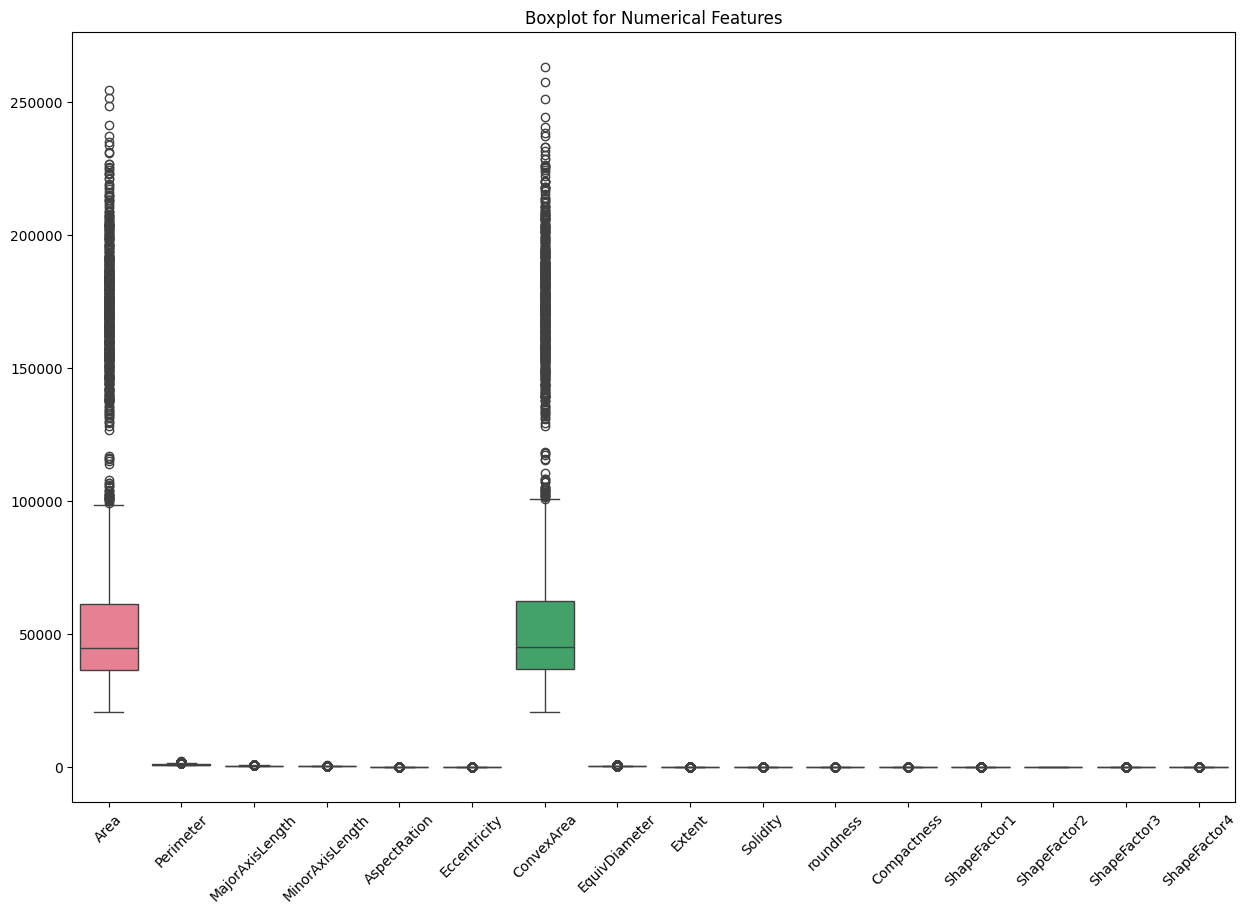


Number of outliers detected in each feature:
Area               483
Perimeter          404
MajorAxisLength    316
MinorAxisLength    508
AspectRation        15
Eccentricity       125
ConvexArea         483
EquivDiameter      465
Extent             135
Solidity           238
roundness           74
Compactness          1
ShapeFactor1        59
ShapeFactor2         5
ShapeFactor3         8
ShapeFactor4       242
dtype: int64


In [11]:
#outlier Detection
# Boxplot for numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.drop(columns='Class'))
plt.xticks(rotation=45)
plt.title('Boxplot for Numerical Features')
plt.show()

# Z-score outlier detection
from scipy.stats import zscore
z_scores = np.abs(zscore(data.drop(columns='Class')))
outliers = (z_scores > 3).sum(axis=0)
print("\nNumber of outliers detected in each feature:")
print(outliers)


### Feature Selection and Preprocessing

1. Correlation

Highly correlated features can cause multicollinearity, leading to less reliable model coefficients and reduced interpretability.

By removing one of each pair of highly correlated features, we ensure that the model isn't over-influenced by redundant information.

Compute the correlation matrix for numerical features.

Visualize it using a heatmap to identify pairs of features with correlations exceeding a predefined threshold (e.g., 0.85).

Drop one feature from each highly correlated pair.

+ Encoding Class:

Used LabelEncoder to convert the categorical target ('Class') into numeric values stored in 'Class_encoded'.

+ Scaling Features:

Standardized the features using StandardScaler to ensure all features have a mean of 0 and a standard deviation of 1. This is essential for PCA.

+ PCA:

Dimensionality reduction techniques like PCA reduce the number of features while retaining the maximum variance in the data.

This is especially helpful when dealing with high-dimensional data, ensuring the reduced dataset is compact and efficient for modeling.

Reduced the dimensions by retaining 95% of the variance in the dataset.


In [12]:
# Encode the target variable 'Class'
label_encoder = LabelEncoder()
data['Class_encoded'] = label_encoder.fit_transform(data['Class'])

In [13]:
# Compute the correlation matrix
corr_matrix = data.drop(columns='Class').corr()


# Remove highly correlated features (threshold = 0.85)
threshold = 0.85
high_corr_features = [column for column in corr_matrix.columns if any(abs(corr_matrix[column]) > threshold) and column != corr_matrix.columns[np.argmax(abs(corr_matrix[column]))]]

data_reduced_corr = data.drop(columns=high_corr_features)




In [14]:
# Separate features and target
X = data_reduced_corr.drop(columns=['Class', 'Class_encoded'])  # Drop target columns
y = data['Class_encoded']

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
from sklearn.decomposition import PCA

# Dimensionality reduction using PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)
print(f"Original feature count: {X.shape[1]}")
print(f"Reduced feature count after PCA: {X_pca.shape[1]}")

Original feature count: 16
Reduced feature count after PCA: 4


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
# Check the split sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 9527
Validation set size: 2042
Test set size: 2042


In [18]:
# Standardize the features (Normalization/Standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the MLP model
class MLPModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)  # Second hidden layer
        self.fc3 = nn.Linear(64, num_classes)  # Output layer
        self.dropout = nn.Dropout(0.3)  # Dropout for regularization
        self.relu = nn.ReLU()  # ReLU activation

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)  # Output logits
        return x

# Define hyperparameters
input_size = X_train.shape[1]  # Number of features
num_classes = len(set(y_train))  # Number of classes
learning_rate = 0.001
batch_size = 32
num_epochs = 50

# Prepare DataLoader
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.long))
val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val.values, dtype=torch.long))

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Initialize model, loss, and optimizer
model = MLPModel(input_size=input_size, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

    val_accuracy = correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}, Val Accuracy: {val_accuracy:.4f}")



# Save the trained model (assuming you have a trained PyTorch model)
torch.save(model.state_dict(), 'model.pth')  # Save only the model parameters (weights)


Epoch 1/50, Train Loss: 0.6223, Val Loss: 0.2505, Val Accuracy: 0.9167
Epoch 2/50, Train Loss: 0.3005, Val Loss: 0.2252, Val Accuracy: 0.9187
Epoch 3/50, Train Loss: 0.2654, Val Loss: 0.2156, Val Accuracy: 0.9221
Epoch 4/50, Train Loss: 0.2488, Val Loss: 0.2116, Val Accuracy: 0.9285
Epoch 5/50, Train Loss: 0.2367, Val Loss: 0.2053, Val Accuracy: 0.9231
Epoch 6/50, Train Loss: 0.2321, Val Loss: 0.2078, Val Accuracy: 0.9251
Epoch 7/50, Train Loss: 0.2291, Val Loss: 0.2123, Val Accuracy: 0.9216
Epoch 8/50, Train Loss: 0.2271, Val Loss: 0.2042, Val Accuracy: 0.9236
Epoch 9/50, Train Loss: 0.2186, Val Loss: 0.1995, Val Accuracy: 0.9270
Epoch 10/50, Train Loss: 0.2191, Val Loss: 0.2030, Val Accuracy: 0.9236
Epoch 11/50, Train Loss: 0.2181, Val Loss: 0.2015, Val Accuracy: 0.9261
Epoch 12/50, Train Loss: 0.2166, Val Loss: 0.2037, Val Accuracy: 0.9310
Epoch 13/50, Train Loss: 0.2154, Val Loss: 0.1986, Val Accuracy: 0.9285
Epoch 14/50, Train Loss: 0.2100, Val Loss: 0.1947, Val Accuracy: 0.9305
E

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score

# Define the model
def build_mlp_model(input_shape, num_classes):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),  # Hidden layer 1
        Dropout(0.3),  # Regularization
        Dense(64, activation='relu'),  # Hidden layer 2
        Dropout(0.3),  # Regularization
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    return model

# Initialize the model
input_shape = X_train.shape[1]  # Number of features
num_classes = len(set(y_train))  # Number of classes
mlp_model = build_mlp_model(input_shape, num_classes)

# Compile the model
mlp_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  # For multiclass classification
    metrics=['accuracy']
)

# Train the model
history = mlp_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate the model
val_loss, val_accuracy = mlp_model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Test the model
y_pred = mlp_model.predict(X_test).argmax(axis=1)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the entire model
mlp_model.save('mlp_model.h5')  # Saves model architecture and weights






Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6765 - loss: 0.9206 - val_accuracy: 0.9119 - val_loss: 0.2492
Epoch 2/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.8974 - loss: 0.3151 - val_accuracy: 0.9197 - val_loss: 0.2203
Epoch 3/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9084 - loss: 0.2699 - val_accuracy: 0.9251 - val_loss: 0.2067
Epoch 4/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.9117 - loss: 0.2436 - val_accuracy: 0.9275 - val_loss: 0.2072
Epoch 5/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.9173 - loss: 0.2484 - val_accuracy: 0.9290 - val_loss: 0.2043
Epoch 6/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.9186 - loss: 0.2267 - val_accuracy: 0.9285 - val_loss: 0.2012
Epoch 7/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.9190 - loss: 0.2255 - val_accuracy: 0.9265 - val_loss: 0.2044
Epoch 8/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.9206 - loss: 0.2295 - val_accuracy: 0

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93       199
           1       1.00      1.00      1.00        78
           2       0.93      0.94      0.94       245
           3       0.92      0.91      0.92       532
           4       0.96      0.98      0.97       289
           5       0.95      0.95      0.95       304
           6       0.86      0.87      0.87       395

    accuracy                           0.93      2042
   macro avg       0.94      0.94      0.94      2042
weighted avg       0.93      0.93      0.93      2042

